In [9]:
%pylab inline

import numpy as np
import os
import astropy.io.fits as pyfits
import matplotlib.pylab as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/work/xiangchong.li/miniconda3/envs/image/lib/python3.11/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
data = pyfits.getdata("/gpfs02/work/xiangchong.li/work/image_tests/hsc_s23b/s23b_sim/match/sim_g1m.fits")
truth_catalog = pyfits.getdata(os.path.join(os.environ["CATSIM_DIR"], "OneDegSq.fits"))

In [18]:
mag_i = 27 - 2.5*np.log10(data["i_modelfit_CModel_instFlux"])
mag_i_truth = truth_catalog[data["truth_index"]]["i_ab"]

/tmp/ipykernel_27865/3089011623.py:1: RuntimeWarning: invalid value encountered in log10
  mag_i = 27 - 2.5*np.log10(data["i_modelfit_CModel_instFlux"])


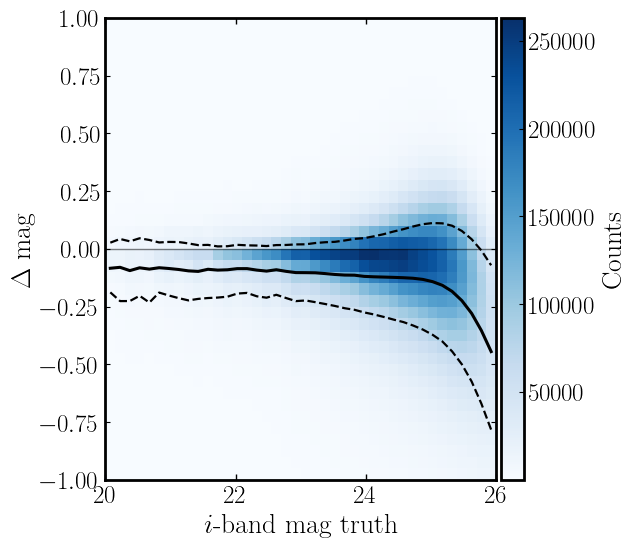

In [42]:
x_range=(20, 26)
y_range=(-1, 1)
x_bins=40
y_bins=40
delta = mag_i - mag_i_truth

fig, ax = plt.subplots(figsize=(6, 6))  # square canvas

# 2D histogram
h = ax.hist2d(
    mag_i_truth, delta,
    bins=[x_bins, y_bins],
    range=[x_range, y_range],
    cmap="Blues",
)

# Colorbar
cbar = plt.colorbar(h[3], ax=ax, pad=0.01)
cbar.set_label('Counts')

# Compute mean and 16/84 percentiles of Δm in bins of mag_i_truth
x_edges = np.linspace(x_range[0], x_range[1], x_bins + 1)
x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
idx = np.digitize(mag_i_truth, x_edges) - 1

mean = np.full(x_bins, np.nan)
p16  = np.full(x_bins, np.nan)
p84  = np.full(x_bins, np.nan)

for i in range(x_bins):
    sel = (idx == i)
    if sel.sum() >= 3:  # require a few points
        vals = delta[sel]
        mean[i] = np.nanmean(vals)
        p16[i]  = np.nanpercentile(vals, 16)
        p84[i]  = np.nanpercentile(vals, 84)
# Overlay lines (black so they pop on the white-zero background)
ax.plot(x_centers, mean, lw=2.2, color='black')
ax.plot(x_centers, p16,  lw=1.6, ls='--', color='black')
ax.plot(x_centers, p84,  lw=1.6, ls='--', color='black')

# Zero reference
ax.axhline(0.0, lw=1.0, color='black', alpha=0.5)

# Styling & layout
ax.set_xlim(*x_range)
ax.set_ylim(*y_range)
ax.set_xlabel(r'$i$-band mag truth')
ax.set_ylabel(r'$\Delta$ mag')
ax.grid(False)